In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import random
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'


Ý tưởng tối ưu hóa đề cập đến cách tiếp cận cơ bản để giải quyết các vấn đề phức tạp bằng cách sử dụng công cụ toán học. Đây cũng là một trong những lý thuyết cơ bản được sử dụng thường xuyên trong quá trình xây dựng mô hình thực tế của các thuật toán học máy hiện đại. Trong quá trình xây dựng mô hình thực tế, thường sẽ xác định các chỉ số đánh giá số học của vấn đề cần giải quyết và dựa trên cơ sở đó, xây dựng phương trình, sử dụng công cụ toán học và liên tục tối ưu hóa kết quả của chỉ số đánh giá, nhằm đạt được kết quả tối ưu có thể đạt được.
## 1. Vấn đề hồi quy tuyến tính
Ngoài việc giải quyết vấn đề hồi quy tuyến tính bằng phương pháp ma trận, cũng có thể chuyển đổi thành vấn đề tối ưu hóa:

- Xác định các chỉ số số học tối ưu hóa
- Xác định hàm mục tiêu tối ưu hóa.

In [2]:
###### trực quan hàm mục tiêu

x = np.arange(0, 6, 0.05)
y = np.arange(-3, 3, 0.05)
a,b = np.meshgrid(x, y)

# hàm mục tiêu: SSE

SSE = (3 - a - b) ** 2 + (6 - 2 * a - b) ** 2

a, b, SSE

(array([[0.  , 0.05, 0.1 , ..., 5.85, 5.9 , 5.95],
        [0.  , 0.05, 0.1 , ..., 5.85, 5.9 , 5.95],
        [0.  , 0.05, 0.1 , ..., 5.85, 5.9 , 5.95],
        ...,
        [0.  , 0.05, 0.1 , ..., 5.85, 5.9 , 5.95],
        [0.  , 0.05, 0.1 , ..., 5.85, 5.9 , 5.95],
        [0.  , 0.05, 0.1 , ..., 5.85, 5.9 , 5.95]]),
 array([[-3.  , -3.  , -3.  , ..., -3.  , -3.  , -3.  ],
        [-2.95, -2.95, -2.95, ..., -2.95, -2.95, -2.95],
        [-2.9 , -2.9 , -2.9 , ..., -2.9 , -2.9 , -2.9 ],
        ...,
        [ 2.85,  2.85,  2.85, ...,  2.85,  2.85,  2.85],
        [ 2.9 ,  2.9 ,  2.9 , ...,  2.9 ,  2.9 ,  2.9 ],
        [ 2.95,  2.95,  2.95, ...,  2.95,  2.95,  2.95]]),
 array([[117.    , 114.6125, 112.25  , ...,   7.3125,   7.85  ,   8.4125],
        [115.505 , 113.1325, 110.785 , ...,   7.5725,   8.125 ,   8.7025],
        [114.02  , 111.6625, 109.33  , ...,   7.8425,   8.41  ,   9.0025],
        ...,
        [  9.945 ,   9.3125,   8.705 , ..., 105.5925, 107.885 , 110.2025],
        [

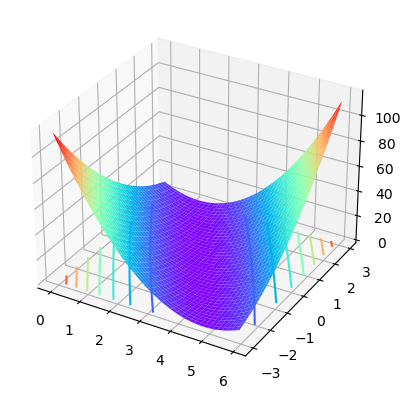

In [3]:
ax = plt.axes(projection='3d')
ax.plot_surface(a, b, SSE, cmap='rainbow')
ax.contour(a, b ,SSE, zdir='z', offset=0, cmap='rainbow');  # chiếu z xuống x, y

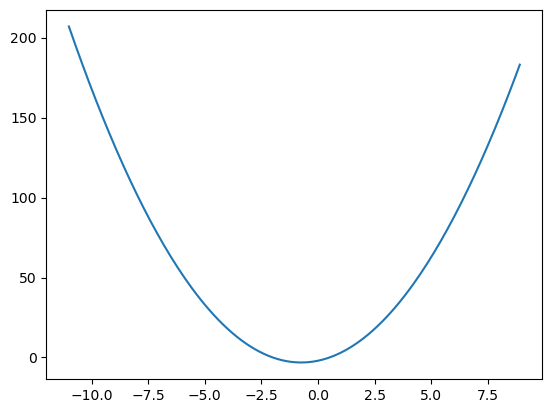

In [4]:
# độ lồi của hàm: hàm tuyến tính đơn giản là một hàm lồi
# trực quan hàm lồi

x = np.arange(-11, 9, 0.1)
y = 2 * x ** 2 + 3 * x - 2
plt.plot(x, y, '-');

In [5]:
# kiểm tra tính lồi của hàm

func = lambda x: 2 * x ** 2 + 3 * x - 2
x1, x2 = random.random() * 20 - 11, random.random() * 20 - 11
(func(x1) + func(x2)) / 2, func((x1+x2)/2)
 # (func_trung bình 2 điểm > func_trung điểm 2 điểm) -> lồi

(3.34475145846821, -3.0033839601187116)

1. Giá trị nhỏ nhất của hàm lồi

Giá trị nhỏ nhất của hàm lồi tồn tại và duy nhất. Phương pháp chung để tìm giá trị nhỏ nhất của hàm lồi bao gồm:
- Đối với hàm một biến, nếu tồn tại một điểm có đạo hàm bằng 0, thì điểm đó là điểm nhỏ nhất.
- Đối với hàm nhiều biến, nếu tồn tại một điểm sao cho các đạo hàm riêng của hàm đối với các biến đều bằng 0, thì điểm đó là điểm nhỏ nhất.

Đối với việc tìm giá trị nhỏ nhất của hàm lồi, điểm khởi đầu cơ bản là tìm các điểm có đạo hàm bằng 0 (điểm dừng). Phương pháp bình phương tối thiểu cũng dựa trên việc giải hệ phương trình liên tục dựa trên việc đặt các đạo hàm riêng bằng 0.

2. Phương pháp xây dựng mô hình học máy

Phương pháp chung trong việc xây dựng mô hình học máy (và học sâu) sử dụng các phương pháp tối ưu hóa như sau:
- Đưa ra mô hình cơ bản
- Xác định hàm mất mát (hàm liên quan đến các tham số của mô hình) và hàm mục tiêu
- Dựa vào đặc điểm của hàm mục tiêu, chọn phương pháp tối ưu hóa để giải quyết hàm mục tiêu
- Giải quyết hàm mục tiêu dựa trên các đặc điểm của nó.

3. Thuật toán tối ưu hóa đầu tiên: Phương pháp bình phương tối thiểu

Hai phương pháp biểu diễn của phương pháp bình phương tối thiểu:
- Biểu diễn đại số
- Biểu diễn ma trận: $\hat{w}^{T} = (X^TX)^{-1}X^Ty$, Điều kiện áp dụng là tích chéo của tensor đặc trưng có thể nghịch đảo.

In [9]:
# biểu diễn bình phương tối thiểu dạng ma trận

X = torch.tensor([[1, 1.], [2, 1]])
y = torch.tensor([[3.], [6]])
X, y

(tensor([[1., 1.],
         [2., 1.]]),
 tensor([[3.],
         [6.]]))

In [10]:
torch.mm(torch.mm(torch.inverse(torch.mm(X.t(), X)), X.t()), y), (X.t() @ X).inverse() @ X.t() @ y

(tensor([[ 3.0000e+00],
         [-9.5367e-07]]),
 tensor([[ 3.0000e+00],
         [-9.5367e-07]]))

In [13]:
torch.linalg.lstsq(y, X)

torch.return_types.linalg_lstsq(
solution=tensor([[0.3333, 0.2000]]),
residuals=tensor([]),
rank=tensor(1),
singular_values=tensor([]))

In [18]:
# chuẩn 2 ma trận

t1 = torch.randint(1, 20, size=(4, )).float()
t2 = torch.randint(1, 20, size=(3, 4), dtype=torch.float)

torch.linalg.norm(t1), t1.square().sum().sqrt()

(tensor(29.4958), tensor(29.4958))

In [20]:
# chuẩn 1 

torch.linalg.norm(t1, 1), t1.abs().sum(0).max()

(tensor(56.), tensor(56.))

## 2. Tính đạo hàm: sử dụng `autograd`
Với ví dụ trên để kiểm tra xem các đạo hàm riêng của hàm mất mát SSE tại điểm (3, 0) có bằng 0 hay không. Để làm điều này, chúng ta cần sử dụng module autograd của PyTorch. Một cách chính xác, autograd là module tự động tích hợp việc tính đạo hàm trong PyTorch. Chúng ta có thể sử dụng các hàm trong module autograd để thực hiện các phép tính đạo hàm. Trong mô hình mạng neural, việc tính gradient thông qua tính toán tự động là trọng tâm của việc tối ưu hóa mô hình.

Trong phiên bản mới của PyTorch, tính khả vi của Tensor trở thành một thuộc tính cơ bản. Chúng ta chỉ cần thiết lập thuộc tính `requires_grad` của Tensor thành True khi tạo Tensor để xác định rằng Tensor có thể được đạo hàm.

`torch.autograd.grad` là hàm vi phân tổng quát, khi chỉ nhập một biến độc lập thì kết quả tính được là đạo hàm, khi nhập nhiều biến độc lập thì đạo hàm riêng sẽ được tính.

In [27]:
# xác định tham số

a = torch.tensor(3., requires_grad=True)
b = torch.tensor(1., requires_grad = True)
a, a.requires_grad, b, b.requires_grad

(tensor(3., requires_grad=True), True, tensor(1., requires_grad=True), True)

In [29]:
# định nghĩa hàm mất mát

sse = torch.square(3 - a - b) + torch.pow(6 - 2 * a - b, 2)
sse

tensor(2., grad_fn=<AddBackward0>)

In [31]:
torch.autograd.grad(sse, (a, b))

(tensor(6.), tensor(4.))

In [35]:
x = torch.tensor(-1., requires_grad=True)
y = 2*x**2 + 3*x-2
torch.autograd.grad(y, x)

(tensor(-1.),)